In [1]:
import numpy as np

In [2]:
z_0_0002 = np.load('../TIE/retrieved_phases/bmstu_phase_big_noise_intensity/BMSTU_phase_dz=-0.0002mm.npy')
z_0_0020 = np.load('../TIE/retrieved_phases/bmstu_phase_big_noise_intensity/BMSTU_phase_dz=-0.0020mm.npy')
z_0_0040 = np.load('../TIE/retrieved_phases/bmstu_phase_big_noise_intensity/BMSTU_phase_dz=-0.0040mm.npy')
z_0_0200 = np.load('../TIE/retrieved_phases/bmstu_phase_big_noise_intensity/BMSTU_phase_dz=-0.0200mm.npy')
z_0_2000 = np.load('../TIE/retrieved_phases/bmstu_phase_big_noise_intensity/BMSTU_phase_dz=-0.2000mm.npy')
z_0_8000 = np.load('../TIE/retrieved_phases/bmstu_phase_big_noise_intensity/BMSTU_phase_dz=-0.8000mm.npy')
z_1_6000 = np.load('../TIE/retrieved_phases/bmstu_phase_big_noise_intensity/BMSTU_phase_dz=-1.6000mm.npy')
z_3_2000 = np.load('../TIE/retrieved_phases/bmstu_phase_big_noise_intensity/BMSTU_phase_dz=-3.2000mm.npy')

phases = [z_0_0002, z_0_0020, z_0_0040, z_0_0200, z_0_2000, z_0_8000, z_1_6000, z_3_2000]

In [3]:
def find_power(data: np.ndarray, threshold:int=0.01) -> int:
    threshold /= 1000
    power = 0
    counter = 0
    for i in data:
        for j in i:
            if (j - counter) ** 2 > threshold: power += j ** 2
            counter = j
        counter = 0
    return power

powers = {}

for tr in range(5, 100, 5):
    print(
        f'z=0.002: {find_power(z_0_0002, threshold=tr)}. ',
        f'z=0.010: {find_power(z_0_0020, threshold=tr)}. '
        f'z=0.400: {find_power(z_0_0040, threshold=tr)}. '
        f'z=0.800: {find_power(z_0_0200, threshold=tr)}. '
        f'z=0.800: {find_power(z_0_2000, threshold=tr)}. '
        f'z=0.800: {find_power(z_0_8000, threshold=tr)}. '
        f'z=0.800: {find_power(z_1_6000, threshold=tr)}. '
        f'z=1.600: {find_power(z_3_2000, threshold=tr)}. tr = {tr}.'
    )
    powers[tr/1000] = [
        find_power(z_0_0002, threshold=tr),
        find_power(z_0_0020, threshold=tr),
        find_power(z_0_0040, threshold=tr),
        find_power(z_0_0200, threshold=tr),
        find_power(z_0_2000, threshold=tr),
        find_power(z_0_8000, threshold=tr),
        find_power(z_1_6000, threshold=tr),
        find_power(z_3_2000, threshold=tr)
    ]

z=0.002: 9892.436542399739.  z=0.010: 1845.9755900101525. z=0.400: 1845.408270672839. z=0.800: 1842.196694494487. z=0.800: 1945.1183625372978. z=0.800: 2563.1451424471607. z=0.800: 2143.677075193513. z=1.600: 1242.7165872315184. tr = 5.
z=0.002: 8751.855030917175.  z=0.010: 1457.2837234010246. z=0.400: 1456.5266210235927. z=0.800: 1452.0670350620633. z=0.800: 1471.3550466588094. z=0.800: 1576.5556266909516. z=0.800: 1012.6228601094484. z=1.600: 382.53547048359553. tr = 10.
z=0.002: 7971.751849956151.  z=0.010: 1187.487229115697. z=0.400: 1186.5273229112543. z=0.800: 1180.919032550484. z=0.800: 1159.7624566657169. z=0.800: 982.9326955344736. z=0.800: 523.122691538972. z=1.600: 147.32753411504987. tr = 15.
z=0.002: 7386.441328698325.  z=0.010: 974.9998864682113. z=0.400: 974.1862480487408. z=0.800: 968.1335182822968. z=0.800: 918.4376983197071. z=0.800: 633.8107456582679. z=0.800: 292.3156349207267. z=1.600: 48.70601002459599. tr = 20.
z=0.002: 6912.399432537416.  z=0.010: 790.9330584578

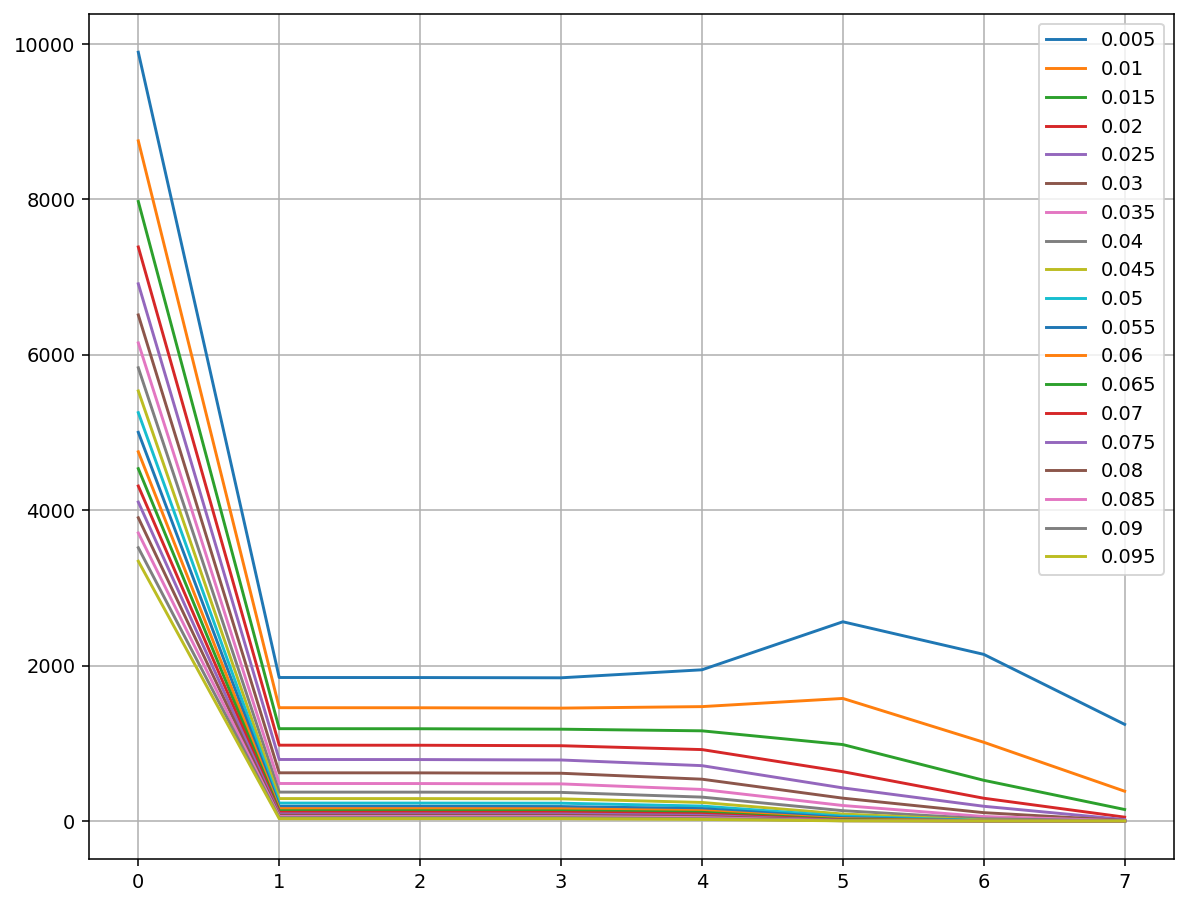

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=140)
for tr, data in powers.items():
    plt.plot(data, label=tr)

plt.legend()
plt.grid(True)
plt.show()